In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [2]:
url = './dataset/ks-projects-201801-Cleaning.csv'
with open(url , 'r') as f:
    ksData = pd.read_csv(f)#.fillna(0)


In [3]:
# adding ylunched year and month to dataset
ksData.drop(['launched year'], axis = 1, inplace = True)
ksData['launched_year'] = pd.DatetimeIndex(ksData['launched']).year
ksData['launched_month'] = pd.DatetimeIndex(ksData['launched']).month
ksData.head()

ID        category main_category country    launched    deadline  \
0  1000002330          Poetry    Publishing      GB  2015-08-11  2015-10-09   
1  1000003930  Narrative Film  Film & Video      US  2017-09-02  2017-11-01   
2  1000004038  Narrative Film  Film & Video      US  2013-01-12  2013-02-26   
3  1000007540           Music         Music      US  2012-03-17  2012-04-16   
4  1000011046    Film & Video  Film & Video      US  2015-07-04  2015-08-29   

                     duration  usd_pledged_real  usd_goal_real  backers  \
0  59 days 00:00:00.000000000               0.0        1533.95        0   
1  60 days 00:00:00.000000000            2421.0       30000.00       15   
2  45 days 00:00:00.000000000             220.0       45000.00        3   
3  30 days 00:00:00.000000000               1.0        5000.00        1   
4  56 days 00:00:00.000000000            1283.0       19500.00       14   

      state  launched_year  launched_month  
0    failed           2015               8  
1    failed           2017               9  
2    failed           2013               1  
3    failed           2012               3  
4  canceled           2015               7

In [4]:
a = ksData.groupby('launched_month')['backers'].sum()
print(a)
#2871668

launched_month
1     2871668
2     3148105
3     3681058
4     3508576
5     3877782
6     3411696
7     3555269
8     3162870
9     3622061
10    3901859
11    3570705
12    1681570
Name: backers, dtype: int64


<Figure size 432x288 with 0 Axes>

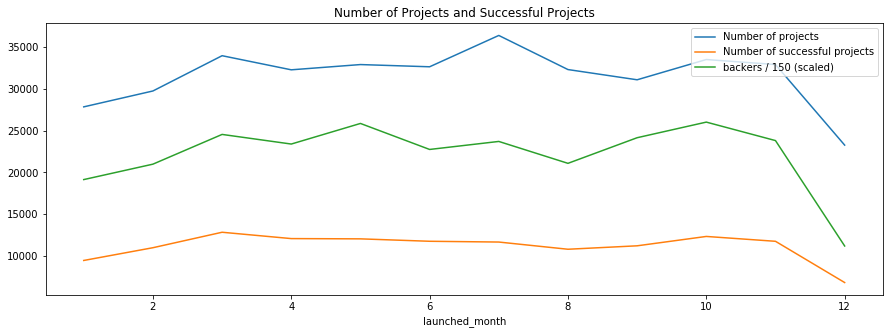

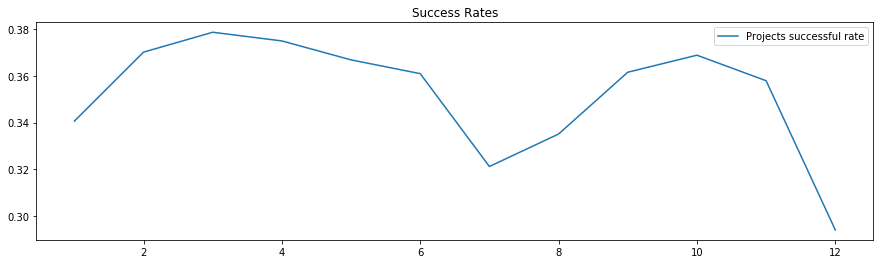

In [5]:
# plot for number of projects and successful 
## need to use sort_index to plot the value
projectNumMonly = ksData['launched_month'].value_counts().rename('Number of projects').sort_index()
successfulNumMonthly = ksData[ksData['state'] == 'successful']['launched_month'].value_counts().rename('Number of successful projects').sort_index()
successfulRate = (successfulNumMonthly/projectNumMonly).rename('Projects successful rate')
backerNumMonthly = ksData.groupby('launched_month')['backers'].sum()/150
backerNumMonthly = backerNumMonthly.rename('backers / 150 (scaled)')
monthPlot = pd.concat([projectNumMonly, successfulNumMonthly,backerNumMonthly], axis=1, join='inner')

pledgedMonthly = ksData.groupby('launched_month')['usd_pledged_real'].sum()

# fig, axes = plt.subplots(nrows=4, ncols=1)
# monthPlot.plot(ax=axes[0],figsize=(15, 15), legend=True, title='Total Projects and Successful Projects')
plt.figure();
monthPlot.plot(figsize=(15, 5), legend=True, title='Number of Projects and Successful Projects')
leg = plt.legend(loc = 'upper right')
plt.figure();
successfulRate.plot(figsize=(15, 4), legend=True, title='Success Rates')
leg = plt.legend(loc = 'upper right')
# plt.figure();
# backerNumMonthly.plot(figsize=(15, 4), legend=True, title='Backers')
# plt.figure();
# pledgedMonthly.plot(figsize=(15, 4), legend=True, title='Pledged Money')

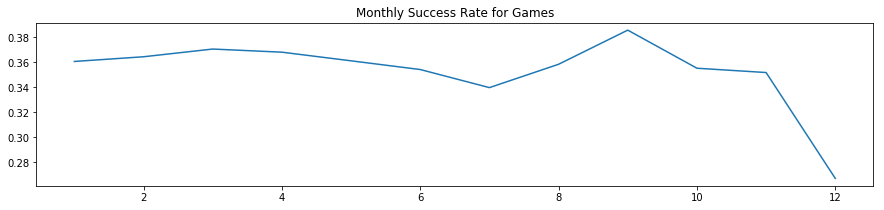

In [6]:
gamesNumMonthly = ksData[ksData['main_category'] == 'Games']['launched_month'].value_counts().rename('Number of games').sort_index()
# gamesNumMonthly.plot( figsize=(15, 3), legend=True, title='Number of Games in Different Months')
successfulGamesNumMonthly = ksData[(ksData['main_category'] == 'Games') & (ksData['state'] == 'successful')]['launched_month'].value_counts().rename('Number of successful Games').sort_index()
# successfulGamesNumMonthly.plot(figsize=(15, 3), legend=True, title='Number of Games and Successful Games in Different Months')
# plt.figure()
gameSuccessfulRate = (successfulGamesNumMonthly/gamesNumMonthly).rename('Game Success Rate')
gameSuccessfulRate.plot(figsize=(15, 3), title='Monthly Success Rate for Games')

In [7]:
categories = ksData['main_category'].unique()
print(categories)

['Publishing' 'Film & Video' 'Music' 'Food' 'Design' 'Crafts' 'Games'
 'Comics' 'Fashion' 'Theater' 'Art' 'Photography' 'Technology' 'Dance'
 'Journalism']


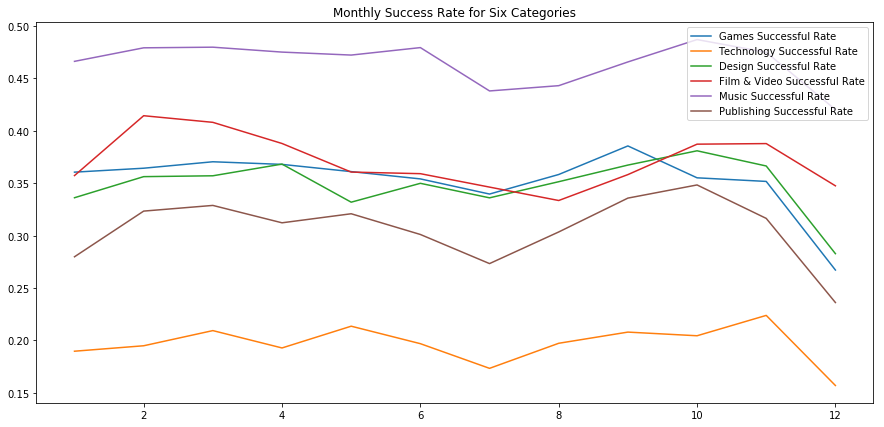

In [8]:
categories = ksData['main_category'].unique()
successfulRateAll = pd.Series()
for category in ['Games', 'Technology', 'Design','Film & Video','Music','Publishing']: 
    numMonthly = ksData[ksData['main_category'] == category]['launched_month'].value_counts().rename('Number of' +str(category)).sort_index()
    successfulNumMonthly = ksData[(ksData['main_category'] == category) & (ksData['state'] == 'successful')]['launched_month'].value_counts().rename('Number of successful' + str(category)).sort_index()
    successfulRate = (successfulNumMonthly/numMonthly).rename(str(category) + ' Successful Rate')
#     pd.concat([successfulRateAll, successfulRate], axis=1, join='inner')
#     print(successfulRateAll)
    successfulRate.plot(figsize=(15, 7),legend=True, title='Monthly Success Rate for Six Categories')
    leg = plt.legend(loc = 'upper right')

## Regions

In [9]:
# delete the rows that has no country 
ksDataCountry = ksData
ksDataCountry.drop(ksDataCountry[ksDataCountry['country'] == 'N,0"'].index , axis = 0, inplace = True) 
ksDataCountry[ksDataCountry['country'] == 'N,0"'].index

Int64Index([], dtype='int64')

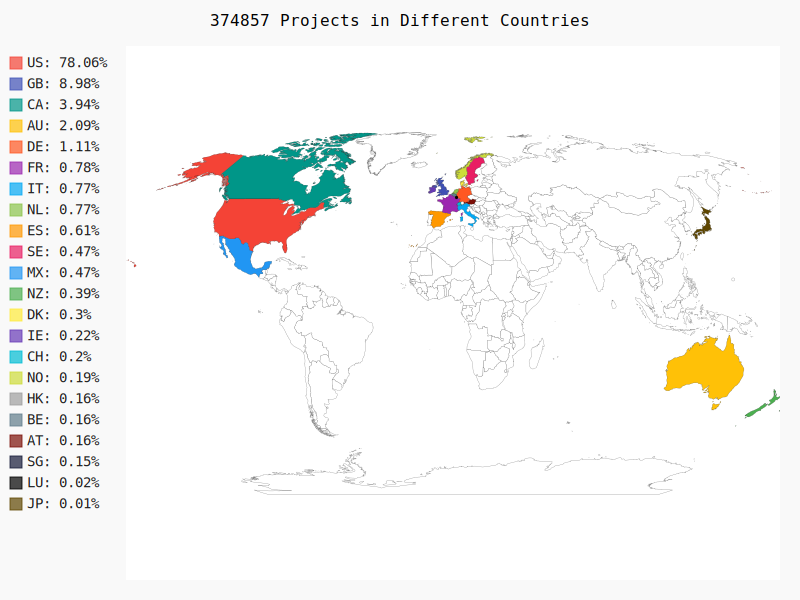

In [10]:
from IPython.display import SVG, display
import pygal

regionCount = ksData['country'].value_counts()
countries = [x.lower() for x in list(regionCount.index)]
# countriesDict = { i : 5 for i in listOfStr }
countriesDict = {}
for i in range(len(countries)):
    countriesDict[countries[i]] = regionCount[i]

worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = str(regionCount.sum()) + ' Projects in Different Countries'
# worldmap_chart.add('F countries', countriesDict)
# worldmap_chart.add('M countries', ['ma', 'mc', 'md', 'me', 'mg',
#                                    'mk', 'ml', 'mm', 'mn', 'mo',
#                                    'mr', 'mt', 'mu', 'mv', 'mw',
#                                    'mx', 'my', 'mz'])
# worldmap_chart.add('U countries', ['ua', 'ug', 'us', 'uy', 'uz'])
for i in range(len(countries)):
    worldmap_chart.add(regionCount.index[i] + ': '+str(round(regionCount[i]/regionCount.sum()*100,2)) + '%', {countries[i]:countriesDict[countries[i]]})

display(SVG(worldmap_chart.render()))

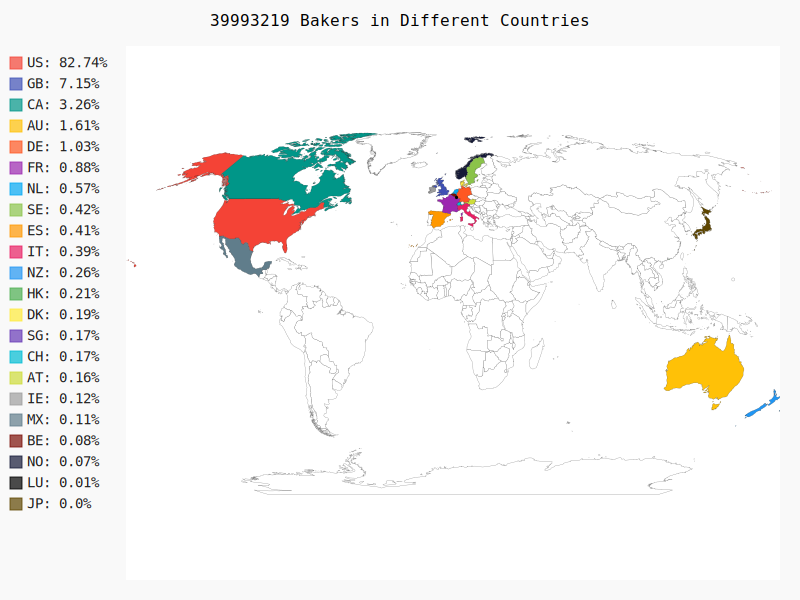

In [11]:
backerRegionCount = ksData.groupby('country')['backers'].sum().sort_values(ascending=False)
countries = [x.lower() for x in list(backerRegionCount.index)]
# countriesDict = { i : 5 for i in listOfStr }
countriesDict = {}
for i in range(len(countries)):
    countriesDict[countries[i]] = backerRegionCount[i]

worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = str(backerRegionCount.sum()) + ' Backers in Different Countries'
# worldmap_chart.add('F countries', countriesDict)
# worldmap_chart.add('M countries', ['ma', 'mc', 'md', 'me', 'mg',
#                                    'mk', 'ml', 'mm', 'mn', 'mo',
#                                    'mr', 'mt', 'mu', 'mv', 'mw',
#                                    'mx', 'my', 'mz'])
# worldmap_chart.add('U countries', ['ua', 'ug', 'us', 'uy', 'uz'])
for i in range(len(countries)):
    worldmap_chart.add(backerRegionCount.index[i] + ': '+str(round(backerRegionCount[i]/backerRegionCount.sum()*100,2)) + '%', {countries[i]:countriesDict[countries[i]]})

display(SVG(worldmap_chart.render()))

In [13]:
i = 0
for c in regionCount.index:
    countrySuccess = ksData[(ksData['country'] == c)&(ksData['state'] == 'successful')]['country'].value_counts()
    a = ksData[(ksData['country'] == c)]['country'].value_counts()
    print(countrySuccess/a)

US    0.373517
Name: country, dtype: float64
GB    0.358369
Name: country, dtype: float64
CA    0.280157
Name: country, dtype: float64
AU    0.25641
Name: country, dtype: float64
DE    0.224646
Name: country, dtype: float64
FR    0.308949
Name: country, dtype: float64
IT    0.152536
Name: country, dtype: float64
NL    0.215132
Name: country, dtype: float64
ES    0.216169
Name: country, dtype: float64
SE    0.289698
Name: country, dtype: float64
MX    0.226027
Name: country, dtype: float64
NZ    0.309606
Name: country, dtype: float64
DK    0.32345
Name: country, dtype: float64
IE    0.25524
Name: country, dtype: float64
CH    0.246053
Name: country, dtype: float64
NO    0.228814
Name: country, dtype: float64
HK    0.349515
Name: country, dtype: float64
BE    0.246353
Name: country, dtype: float64
AT    0.179229
Name: country, dtype: float64
SG    0.320721
Name: country, dtype: float64
LU    0.306452
Name: country, dtype: float64
JP    0.175
Name: country, dtype: float64


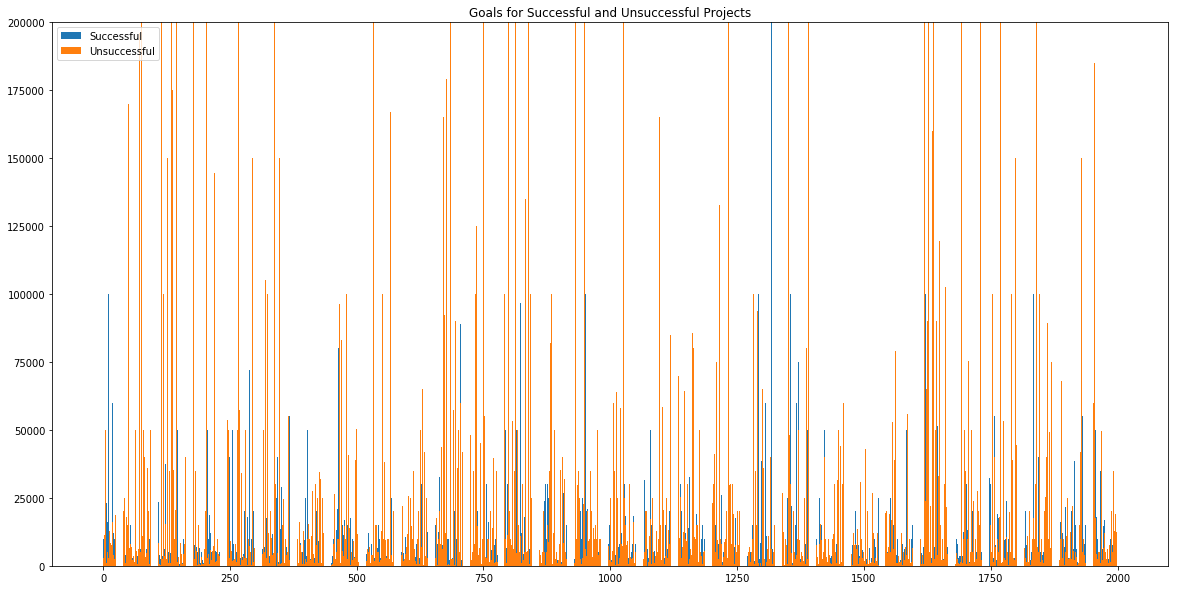

In [74]:
import numpy as np
successGoal = ksData[(ksData['state'] == 'successful')]['usd_goal_real'][5000:7000]
unSuccessGoal = ksData[(ksData['state'] != 'successful')]['usd_goal_real'][5000:7000]
# sum1 = np.zeros(5,dtype=int)
# sum2 = np.zeros(5,dtype=int)
# print(len(successGoal))
# print(len(unSuccessGoal))
# for i in range(len(successGoal)):
#     if successGoal.values[i] < 25000:
#         sum1[0] += 1
#     elif successGoal.values[i] < 50000:
#         sum1[1] += 1
#     elif successGoal.values[i] < 75000:
#         sum1[2] += 1
#     elif successGoal.values[i] < 100000:
#         sum1[3] += 1
#     elif successGoal.values[i] < 125000:
#         sum1[4] += 1
# for j in range(len(successGoal)):
#     if unSuccessGoal.values[j] < 25000:
#         sum2[0] += 1
#     elif unSuccessGoal.values[i] < 50000:
#         sum2[1] += 1
#     elif unSuccessGoal.values[i] < 75000:
#         sum2[2] += 1
#     elif unSuccessGoal.values[i] < 100000:
#         sum2[3] += 1
#     elif unSuccessGoal.values[i] < 125000:
#         sum2[4] += 1
        
# print(sum1)
# print(sum2)
# unSuccessGoal = ksData[(ksData['state'] != 'successful')]['usd_goal_real'][0:5000]
x = np.arange(len(successGoal))
plt.figure(figsize=(20,10))
plt.bar(x, successGoal)
plt.bar(x, unSuccessGoal)
plt.ylim(top=200000)  # adjust the top leaving bottom unchanged
plt.ylim(bottom=0) 
state = ['Successful', 'Unsuccessful']
plt.legend(state,loc=2)
plt.title('Goals for Successful and Unsuccessful Projects')
plt.show()


In [54]:
successGoal = ksData[(ksData['state'] == 'successful')]['usd_goal_real']
successGoal.values[10]

50000.0